In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("project_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_pa,p_total_hits,p_k_percent,...,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
0,Wainwright,Adam,425794,2020,39,10,65.2,262,54,20.6,...,39.8,20.9,67.6,44.0,21.5,27.7,6.8,59.2,38.3,2.5
1,Greinke,Zack,425844,2020,37,12,67.0,273,67,24.5,...,42.3,26.0,61.9,42.9,18.9,30.6,7.7,43.5,33.2,23.3
2,Lester,Jon,452657,2020,36,12,61.0,265,64,15.8,...,41.4,23.2,58.9,48.3,23.2,23.6,4.9,73.7,12.8,13.5
3,Scherzer,Max,453286,2020,36,12,67.1,295,70,31.2,...,32.4,33.0,65.8,34.6,22.3,34.1,8.9,55.6,28.4,16.1
4,Cueto,Johnny,456501,2020,34,12,63.1,277,61,20.2,...,31.3,20.3,55.6,42.7,22.4,30.2,4.7,43.7,29.2,27.1


In [3]:
df.dtypes

last_name                 object
 first_name               object
player_id                  int64
year                       int64
player_age                 int64
p_game                     int64
p_formatted_ip           float64
p_total_pa                 int64
p_total_hits               int64
p_k_percent              float64
p_bb_percent             float64
p_out                      int64
p_era                    float64
z_swing_percent          float64
z_swing_miss_percent     float64
oz_swing_percent         float64
oz_swing_miss_percent    float64
oz_contact_percent       float64
out_zone_percent         float64
meatball_percent         float64
iz_contact_percent       float64
in_zone_percent          float64
edge_percent             float64
whiff_percent            float64
swing_percent            float64
pull_percent             float64
straightaway_percent     float64
opposite_percent         float64
f_strike_percent         float64
groundballs_percent      float64
flyballs_p

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['player_age', 'p_game', 'p_formatted_ip', 'p_total_pa', 'p_total_hits', 'p_k_percent',\
                       'p_bb_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent',\
                        'oz_contact_percent', 'out_zone_percent', 'meatball_percent', 'iz_contact_percent', 'in_zone_percent',\
                        'edge_percent', 'whiff_percent', 'swing_percent', 'pull_percent', 'straightaway_percent',\
                        'opposite_percent', 'f_strike_percent', 'groundballs_percent', 'flyballs_percent', 'linedrives_percent',\
                        'popups_percent', 'n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted' ]]

In [5]:
selected_features.head()

,player_age,p_game,p_formatted_ip,p_total_pa,p_total_hits,p_k_percent,p_bb_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,...,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
0,39,10,65.2,262,54,20.6,5.7,62.9,15.2,30.2,...,39.8,20.9,67.6,44.0,21.5,27.7,6.8,59.2,38.3,2.5
1,37,12,67.0,273,67,24.5,3.3,59.7,17.0,26.3,...,42.3,26.0,61.9,42.9,18.9,30.6,7.7,43.5,33.2,23.3
2,36,12,61.0,265,64,15.8,6.4,67.4,11.3,25.9,...,41.4,23.2,58.9,48.3,23.2,23.6,4.9,73.7,12.8,13.5
3,36,12,67.1,295,70,31.2,7.8,71.5,25.8,30.1,...,32.4,33.0,65.8,34.6,22.3,34.1,8.9,55.6,28.4,16.1
4,34,12,63.1,277,61,20.2,9.4,68.1,14.5,25.8,...,31.3,20.3,55.6,42.7,22.4,30.2,4.7,43.7,29.2,27.1


In [6]:
X = selected_features
y = df[['p_out']]
print(X.shape, y.shape)

(323, 30) (323, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=100, activation = "relu", input_dim = 30))
model.add(Dense(units=100, activation = "relu"))
#model.add(Dense(units=60, activation = "relu"))
#model.add(Dense(units=60, activation = "relu"))
#model.add(Dense(units=60, activation = "relu"))
model.add(Dense(units=1, activation = "relu"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [12]:
# Fit the model to the training data
#look up validation error, train fit vs validation fit, make sure it's not overfitting
# validation error > train error, that's when you have your epoch number
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split = 0.2,
    epochs=750,
    shuffle=True,
    verbose=2
)

Epoch 1/750
7/7 - 1s - loss: 277672.1875 - mean_absolute_error: 512.0451 - val_loss: 276698.6875 - val_mean_absolute_error: 515.5183
Epoch 2/750
7/7 - 0s - loss: 276259.5938 - mean_absolute_error: 510.6434 - val_loss: 275298.4375 - val_mean_absolute_error: 514.1603
Epoch 3/750
7/7 - 0s - loss: 274691.5938 - mean_absolute_error: 509.0672 - val_loss: 273632.0312 - val_mean_absolute_error: 512.5532
Epoch 4/750
7/7 - 0s - loss: 272812.7500 - mean_absolute_error: 507.2082 - val_loss: 271560.6250 - val_mean_absolute_error: 510.5601
Epoch 5/750
7/7 - 0s - loss: 270462.6250 - mean_absolute_error: 504.8579 - val_loss: 268952.0312 - val_mean_absolute_error: 508.0541
Epoch 6/750
7/7 - 0s - loss: 267510.0938 - mean_absolute_error: 501.9409 - val_loss: 265692.7812 - val_mean_absolute_error: 504.9280
Epoch 7/750
7/7 - 0s - loss: 263868.1562 - mean_absolute_error: 498.3593 - val_loss: 261787.2812 - val_mean_absolute_error: 501.1685
Epoch 8/750
7/7 - 0s - loss: 259455.3125 - mean_absolute_error: 493.9

Epoch 64/750
7/7 - 0s - loss: 7782.8237 - mean_absolute_error: 70.8682 - val_loss: 14634.3467 - val_mean_absolute_error: 97.1816
Epoch 65/750
7/7 - 0s - loss: 7729.3525 - mean_absolute_error: 70.6831 - val_loss: 14325.2988 - val_mean_absolute_error: 95.9014
Epoch 66/750
7/7 - 0s - loss: 7647.2407 - mean_absolute_error: 70.3221 - val_loss: 14205.2822 - val_mean_absolute_error: 95.2352
Epoch 67/750
7/7 - 0s - loss: 7578.7642 - mean_absolute_error: 70.1201 - val_loss: 14180.1943 - val_mean_absolute_error: 94.9798
Epoch 68/750
7/7 - 0s - loss: 7460.2939 - mean_absolute_error: 69.4824 - val_loss: 14075.0957 - val_mean_absolute_error: 94.4581
Epoch 69/750
7/7 - 0s - loss: 7351.6733 - mean_absolute_error: 68.9194 - val_loss: 13964.9883 - val_mean_absolute_error: 93.9949
Epoch 70/750
7/7 - 0s - loss: 7252.2188 - mean_absolute_error: 68.4292 - val_loss: 13847.6738 - val_mean_absolute_error: 93.4931
Epoch 71/750
7/7 - 0s - loss: 7143.8926 - mean_absolute_error: 67.8142 - val_loss: 13736.9541 - v

Epoch 128/750
7/7 - 0s - loss: 3898.6641 - mean_absolute_error: 49.3580 - val_loss: 9796.8779 - val_mean_absolute_error: 75.6766
Epoch 129/750
7/7 - 0s - loss: 3884.0259 - mean_absolute_error: 49.5059 - val_loss: 9801.5176 - val_mean_absolute_error: 75.9115
Epoch 130/750
7/7 - 0s - loss: 3870.7241 - mean_absolute_error: 49.4695 - val_loss: 9791.9844 - val_mean_absolute_error: 75.8433
Epoch 131/750
7/7 - 0s - loss: 3812.4414 - mean_absolute_error: 49.0551 - val_loss: 9967.5674 - val_mean_absolute_error: 76.1718
Epoch 132/750
7/7 - 0s - loss: 3736.8323 - mean_absolute_error: 48.5942 - val_loss: 9910.7432 - val_mean_absolute_error: 75.9434
Epoch 133/750
7/7 - 0s - loss: 3681.5825 - mean_absolute_error: 48.1051 - val_loss: 9851.0791 - val_mean_absolute_error: 75.8535
Epoch 134/750
7/7 - 0s - loss: 3648.4766 - mean_absolute_error: 47.8647 - val_loss: 9819.2881 - val_mean_absolute_error: 76.0946
Epoch 135/750
7/7 - 0s - loss: 3602.9604 - mean_absolute_error: 47.5405 - val_loss: 9670.4277 - v

Epoch 192/750
7/7 - 0s - loss: 2190.3633 - mean_absolute_error: 36.1382 - val_loss: 6671.4414 - val_mean_absolute_error: 63.0299
Epoch 193/750
7/7 - 0s - loss: 2168.6326 - mean_absolute_error: 35.9937 - val_loss: 6667.7559 - val_mean_absolute_error: 62.8961
Epoch 194/750
7/7 - 0s - loss: 2141.0483 - mean_absolute_error: 35.7565 - val_loss: 6642.8867 - val_mean_absolute_error: 62.7476
Epoch 195/750
7/7 - 0s - loss: 2125.6970 - mean_absolute_error: 35.6955 - val_loss: 6623.3472 - val_mean_absolute_error: 62.6448
Epoch 196/750
7/7 - 0s - loss: 2104.7722 - mean_absolute_error: 35.5700 - val_loss: 6597.9648 - val_mean_absolute_error: 62.5977
Epoch 197/750
7/7 - 0s - loss: 2089.4370 - mean_absolute_error: 35.4204 - val_loss: 6572.4526 - val_mean_absolute_error: 62.6024
Epoch 198/750
7/7 - 0s - loss: 2063.9849 - mean_absolute_error: 35.2691 - val_loss: 6557.6274 - val_mean_absolute_error: 62.6145
Epoch 199/750
7/7 - 0s - loss: 2049.8718 - mean_absolute_error: 35.1807 - val_loss: 6590.9731 - v

Epoch 256/750
7/7 - 0s - loss: 1301.6846 - mean_absolute_error: 27.2180 - val_loss: 5056.0830 - val_mean_absolute_error: 56.4788
Epoch 257/750
7/7 - 0s - loss: 1280.3916 - mean_absolute_error: 27.0703 - val_loss: 5011.7378 - val_mean_absolute_error: 56.2070
Epoch 258/750
7/7 - 0s - loss: 1267.6038 - mean_absolute_error: 26.8883 - val_loss: 5015.7900 - val_mean_absolute_error: 56.2027
Epoch 259/750
7/7 - 0s - loss: 1254.7109 - mean_absolute_error: 26.7357 - val_loss: 5042.8628 - val_mean_absolute_error: 56.3608
Epoch 260/750
7/7 - 0s - loss: 1260.3453 - mean_absolute_error: 26.7337 - val_loss: 5015.9155 - val_mean_absolute_error: 56.2630
Epoch 261/750
7/7 - 0s - loss: 1244.9958 - mean_absolute_error: 26.5646 - val_loss: 4984.9507 - val_mean_absolute_error: 56.0602
Epoch 262/750
7/7 - 0s - loss: 1231.0341 - mean_absolute_error: 26.4620 - val_loss: 4926.3994 - val_mean_absolute_error: 55.6571
Epoch 263/750
7/7 - 0s - loss: 1213.5282 - mean_absolute_error: 26.2436 - val_loss: 4896.4746 - v

Epoch 320/750
7/7 - 0s - loss: 781.7175 - mean_absolute_error: 21.0467 - val_loss: 3854.0417 - val_mean_absolute_error: 49.7750
Epoch 321/750
7/7 - 0s - loss: 758.0704 - mean_absolute_error: 20.9286 - val_loss: 3762.9253 - val_mean_absolute_error: 49.6682
Epoch 322/750
7/7 - 0s - loss: 766.3845 - mean_absolute_error: 20.9070 - val_loss: 3731.9597 - val_mean_absolute_error: 49.6151
Epoch 323/750
7/7 - 0s - loss: 763.9667 - mean_absolute_error: 20.8805 - val_loss: 3700.0618 - val_mean_absolute_error: 49.1974
Epoch 324/750
7/7 - 0s - loss: 738.9137 - mean_absolute_error: 20.4613 - val_loss: 3754.6687 - val_mean_absolute_error: 48.9216
Epoch 325/750
7/7 - 0s - loss: 734.6622 - mean_absolute_error: 20.6704 - val_loss: 3708.4241 - val_mean_absolute_error: 48.7906
Epoch 326/750
7/7 - 0s - loss: 729.3936 - mean_absolute_error: 20.6135 - val_loss: 3694.0847 - val_mean_absolute_error: 48.7758
Epoch 327/750
7/7 - 0s - loss: 720.8264 - mean_absolute_error: 20.3185 - val_loss: 3732.9614 - val_mean_

Epoch 385/750
7/7 - 0s - loss: 453.4503 - mean_absolute_error: 16.0660 - val_loss: 3095.6638 - val_mean_absolute_error: 44.4652
Epoch 386/750
7/7 - 0s - loss: 460.6489 - mean_absolute_error: 16.0691 - val_loss: 3103.6155 - val_mean_absolute_error: 44.0358
Epoch 387/750
7/7 - 0s - loss: 448.4690 - mean_absolute_error: 15.9508 - val_loss: 3058.6533 - val_mean_absolute_error: 43.6588
Epoch 388/750
7/7 - 0s - loss: 442.7404 - mean_absolute_error: 15.9735 - val_loss: 3036.7986 - val_mean_absolute_error: 43.6559
Epoch 389/750
7/7 - 0s - loss: 437.5169 - mean_absolute_error: 15.7942 - val_loss: 2976.4180 - val_mean_absolute_error: 43.4998
Epoch 390/750
7/7 - 0s - loss: 437.5518 - mean_absolute_error: 15.6119 - val_loss: 2970.5664 - val_mean_absolute_error: 43.5901
Epoch 391/750
7/7 - 0s - loss: 450.0176 - mean_absolute_error: 15.8027 - val_loss: 3024.7434 - val_mean_absolute_error: 43.8428
Epoch 392/750
7/7 - 0s - loss: 487.0601 - mean_absolute_error: 16.3821 - val_loss: 3022.7419 - val_mean_

Epoch 450/750
7/7 - 0s - loss: 295.3726 - mean_absolute_error: 12.8430 - val_loss: 2443.8445 - val_mean_absolute_error: 40.0803
Epoch 451/750
7/7 - 0s - loss: 278.4652 - mean_absolute_error: 12.4163 - val_loss: 2444.9106 - val_mean_absolute_error: 39.7966
Epoch 452/750
7/7 - 0s - loss: 266.9571 - mean_absolute_error: 12.0587 - val_loss: 2437.1189 - val_mean_absolute_error: 39.7366
Epoch 453/750
7/7 - 0s - loss: 268.9492 - mean_absolute_error: 12.1678 - val_loss: 2404.7981 - val_mean_absolute_error: 39.5120
Epoch 454/750
7/7 - 0s - loss: 291.1009 - mean_absolute_error: 12.9379 - val_loss: 2394.1021 - val_mean_absolute_error: 39.3795
Epoch 455/750
7/7 - 0s - loss: 284.5773 - mean_absolute_error: 12.5450 - val_loss: 2406.3113 - val_mean_absolute_error: 39.4792
Epoch 456/750
7/7 - 0s - loss: 262.9211 - mean_absolute_error: 11.8724 - val_loss: 2405.2097 - val_mean_absolute_error: 39.4580
Epoch 457/750
7/7 - 0s - loss: 254.6271 - mean_absolute_error: 11.5744 - val_loss: 2397.5200 - val_mean_

Epoch 515/750
7/7 - 0s - loss: 156.8215 - mean_absolute_error: 9.0552 - val_loss: 2076.5984 - val_mean_absolute_error: 36.9523
Epoch 516/750
7/7 - 0s - loss: 152.9774 - mean_absolute_error: 8.8286 - val_loss: 2053.3877 - val_mean_absolute_error: 36.8683
Epoch 517/750
7/7 - 0s - loss: 152.3727 - mean_absolute_error: 8.9269 - val_loss: 2038.1292 - val_mean_absolute_error: 36.7351
Epoch 518/750
7/7 - 0s - loss: 156.2639 - mean_absolute_error: 9.3232 - val_loss: 2070.0269 - val_mean_absolute_error: 36.8552
Epoch 519/750
7/7 - 0s - loss: 156.6918 - mean_absolute_error: 9.0822 - val_loss: 2154.2634 - val_mean_absolute_error: 37.7291
Epoch 520/750
7/7 - 0s - loss: 197.3990 - mean_absolute_error: 10.2367 - val_loss: 2306.9082 - val_mean_absolute_error: 38.3775
Epoch 521/750
7/7 - 0s - loss: 221.9107 - mean_absolute_error: 10.8198 - val_loss: 2259.2300 - val_mean_absolute_error: 37.8983
Epoch 522/750
7/7 - 0s - loss: 174.9676 - mean_absolute_error: 9.4499 - val_loss: 2134.6724 - val_mean_absolu

Epoch 580/750
7/7 - 0s - loss: 93.6227 - mean_absolute_error: 7.0298 - val_loss: 1828.1941 - val_mean_absolute_error: 34.5188
Epoch 581/750
7/7 - 0s - loss: 98.4726 - mean_absolute_error: 7.2458 - val_loss: 1846.6235 - val_mean_absolute_error: 35.0211
Epoch 582/750
7/7 - 0s - loss: 92.9762 - mean_absolute_error: 6.8834 - val_loss: 1847.6290 - val_mean_absolute_error: 35.0278
Epoch 583/750
7/7 - 0s - loss: 87.9593 - mean_absolute_error: 6.7507 - val_loss: 1833.3066 - val_mean_absolute_error: 34.8982
Epoch 584/750
7/7 - 0s - loss: 87.8034 - mean_absolute_error: 6.6923 - val_loss: 1865.4725 - val_mean_absolute_error: 34.9290
Epoch 585/750
7/7 - 0s - loss: 87.6302 - mean_absolute_error: 6.7557 - val_loss: 1862.3296 - val_mean_absolute_error: 34.7246
Epoch 586/750
7/7 - 0s - loss: 84.8617 - mean_absolute_error: 6.6358 - val_loss: 1851.3564 - val_mean_absolute_error: 34.8922
Epoch 587/750
7/7 - 0s - loss: 80.9902 - mean_absolute_error: 6.3546 - val_loss: 1849.2952 - val_mean_absolute_error: 

Epoch 646/750
7/7 - 0s - loss: 47.8374 - mean_absolute_error: 4.9651 - val_loss: 1658.5734 - val_mean_absolute_error: 33.3069
Epoch 647/750
7/7 - 0s - loss: 49.4334 - mean_absolute_error: 4.8651 - val_loss: 1682.5366 - val_mean_absolute_error: 33.4669
Epoch 648/750
7/7 - 0s - loss: 50.7202 - mean_absolute_error: 5.0283 - val_loss: 1656.6407 - val_mean_absolute_error: 33.4586
Epoch 649/750
7/7 - 0s - loss: 45.5295 - mean_absolute_error: 4.9069 - val_loss: 1641.0876 - val_mean_absolute_error: 33.2729
Epoch 650/750
7/7 - 0s - loss: 44.3654 - mean_absolute_error: 4.8464 - val_loss: 1632.9197 - val_mean_absolute_error: 32.9398
Epoch 651/750
7/7 - 0s - loss: 60.1611 - mean_absolute_error: 5.7545 - val_loss: 1618.8406 - val_mean_absolute_error: 32.2758
Epoch 652/750
7/7 - 0s - loss: 59.5980 - mean_absolute_error: 5.6651 - val_loss: 1609.9774 - val_mean_absolute_error: 32.8735
Epoch 653/750
7/7 - 0s - loss: 55.9839 - mean_absolute_error: 5.6179 - val_loss: 1656.1156 - val_mean_absolute_error: 

Epoch 712/750
7/7 - 0s - loss: 28.9790 - mean_absolute_error: 3.9609 - val_loss: 1504.6788 - val_mean_absolute_error: 32.2442
Epoch 713/750
7/7 - 0s - loss: 26.7580 - mean_absolute_error: 3.7875 - val_loss: 1502.4266 - val_mean_absolute_error: 32.0506
Epoch 714/750
7/7 - 0s - loss: 22.7749 - mean_absolute_error: 3.3225 - val_loss: 1500.3269 - val_mean_absolute_error: 31.8782
Epoch 715/750
7/7 - 0s - loss: 22.1903 - mean_absolute_error: 3.3192 - val_loss: 1493.4657 - val_mean_absolute_error: 31.9525
Epoch 716/750
7/7 - 0s - loss: 21.2850 - mean_absolute_error: 3.2032 - val_loss: 1517.9767 - val_mean_absolute_error: 32.1423
Epoch 717/750
7/7 - 0s - loss: 23.3894 - mean_absolute_error: 3.3067 - val_loss: 1552.0052 - val_mean_absolute_error: 32.0642
Epoch 718/750
7/7 - 0s - loss: 24.2732 - mean_absolute_error: 3.4906 - val_loss: 1541.3762 - val_mean_absolute_error: 32.2788
Epoch 719/750
7/7 - 0s - loss: 21.7960 - mean_absolute_error: 3.2748 - val_loss: 1528.7308 - val_mean_absolute_error: 

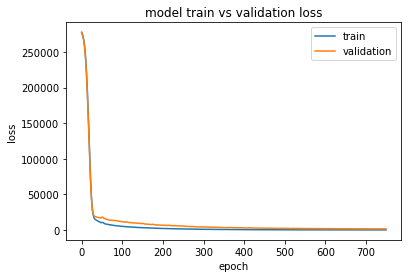

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [14]:
#train evaluation
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, y_train, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 310.4760 - mean_absolute_error: 8.6937
Deep Neural Network - Loss: 310.4759521484375, Accuracy: 8.693694114685059


In [15]:
#test evaluation
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 2000.3105 - mean_absolute_error: 34.0910
Deep Neural Network - Loss: 2000.310546875, Accuracy: 34.091026306152344


In [16]:
#save model
#model.save("outs_predictor_model_trained.h5")